In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd

import minkowski_tools as mt

In [32]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [23]:
n=8000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [10]:
connections = mt.get_connections(points, pval=2, radius=.05)
short_path, short_length = mt.shortest_path(connections.astype(bool))

(31.0, 1.4142135623730951)

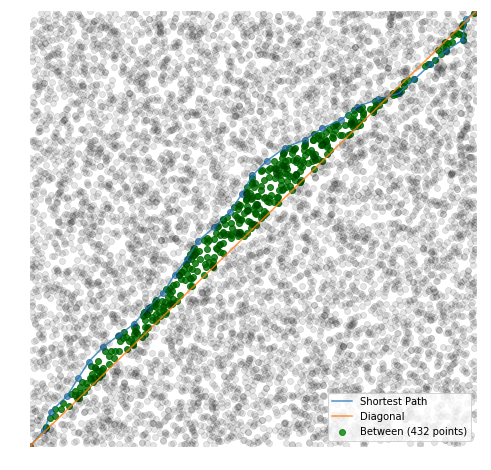

In [11]:
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
fig, ax = plt.subplots(figsize=(8, 8))
betweens = mt.points_between(points, short_path_points)
ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
mt.plot_path_points(ax, paths=[short_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Shortest Path', 'Diagonal'])
ax.scatter(*points, c='k', alpha=0.1)
short_length, np.sqrt(2)

In [14]:
long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
long_path, long_length = mt.longest_path(connections)
short_path, short_length = mt.shortest_path(connections)
short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))

In [8]:
# fig, axes = plt.subplots(ncols=2,figsize=(10, 5))
# ax, ax2 = axes

In [19]:
long_path_points = np.array([points[:, u] for u in long_path]).transpose()
long_path_pointsBool = np.array([points[:, u] for u in long_pathBool]).transpose()
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
short_path_pointsBool = np.array([points[:, u] for u in short_pathBool]).transpose()

Longest Distance 1.6016351045329356
Longest Network 45.0
Shortest Distance 1.4157109896939934
Shortest Network 31.0


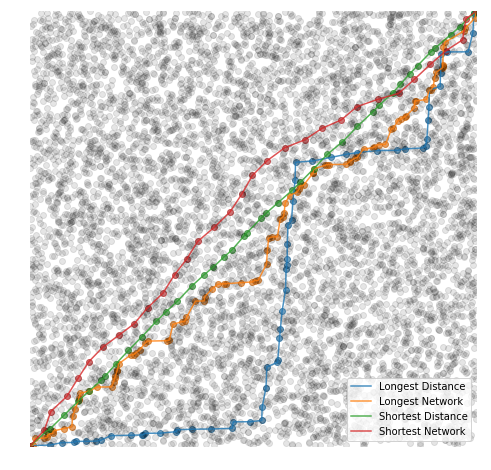

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
# betweens = mt.points_between(points, long_path_points)
# ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
# mt.plot_path_points(ax, paths=[long_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Longest Path', 'Diagonal'])
mt.plot_path_points(ax, paths=[long_path_points, long_path_pointsBool, short_path_points, short_path_pointsBool], path_labels=['Longest Distance', 'Longest Network', 'Shortest Distance', 'Shortest Network'])
ax.scatter(*points, c='k', alpha=0.1)

path_labels=['Longest Distance', 'Longest Network', 'Shortest Distance', 'Shortest Network']
dists = [long_length, long_lengthBool, short_length, short_lengthBool]

for label, dist in zip(path_labels, dists):
    print(label, dist)

36.22001693365767


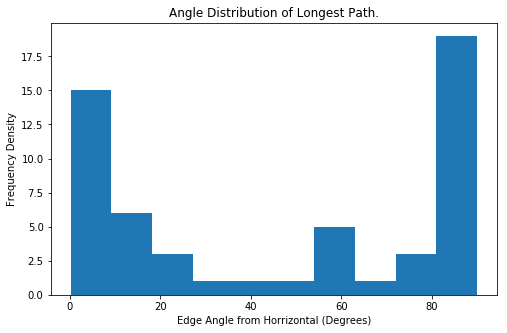

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
long_angles = mt.path_angles(long_path_points)*180/np.pi #puts into degrees
ax.hist(long_angles)
ax.set(title='Angle Distribution of Longest Path.', xlabel='Edge Angle from Horrizontal (Degrees)', ylabel='Frequency Density')
print(np.std(long_angles))

In [275]:
n=8000
n_systems = 10

ps, rs = [0.8, 1, 1.2], [0.2, 0.1, 0.1]

ps = [0.6, 0.8, 1, 1.2, 1.4]
r_rel = np.array([1.43, 1.14, 1, 0.92, 0.87])
rs = r_rel/30

ensemble_points = [np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1) for count in range(n_systems)]

ensemble_short_paths = []

for points, i in zip(ensemble_points, range(n_systems)):
    print(i)
    print('Getting connections', end='')
    diff_connections = [mt.get_connections(points, pval=p, radius=r) for p, r,label in zip(ps, rs, path_labels) if not print(': '+ label, end=' ')]
    print()
    print('Getting shortest paths', end='')
    short_paths = [mt.shortest_path(connections)[0] for connections, label in zip(diff_connections, path_labels) if not print(': '+ label, end=' ')]
    print()    
    
    short_path_points = {p:np.array([points[:, u] for u in path]).transpose() for p, path in zip(ps, short_paths)}
    ensemble_short_paths.append(short_path_points)

0
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
1
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
2
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
3
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
4
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : 

KeyError: 7999

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


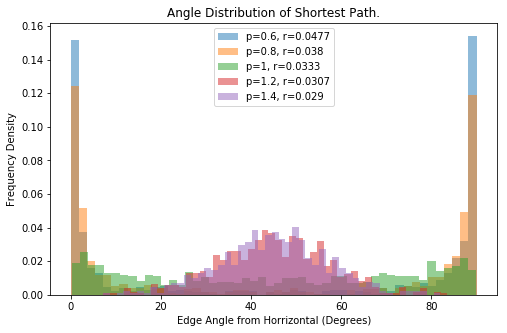

In [276]:
fig, ax = plt.subplots(figsize=(8, 5))

for p, r in zip(ps, rs):
    flat_angles = (np.concatenate([mt.path_angles(all_paths[p]) for all_paths in ensemble_short_paths], axis=0))
    ax.hist(flat_angles*180/np.pi, label='p={}, r={:.3}'.format(p, r), alpha=0.5, bins=50, normed=1)

ax.set(title='Angle Distribution of Shortest Path.', xlabel='Edge Angle from Horrizontal (Degrees)', ylabel='Frequency Density')
ax.legend()
# plt.savefig('img/2ang_dist_10_8e3_30.pdf')

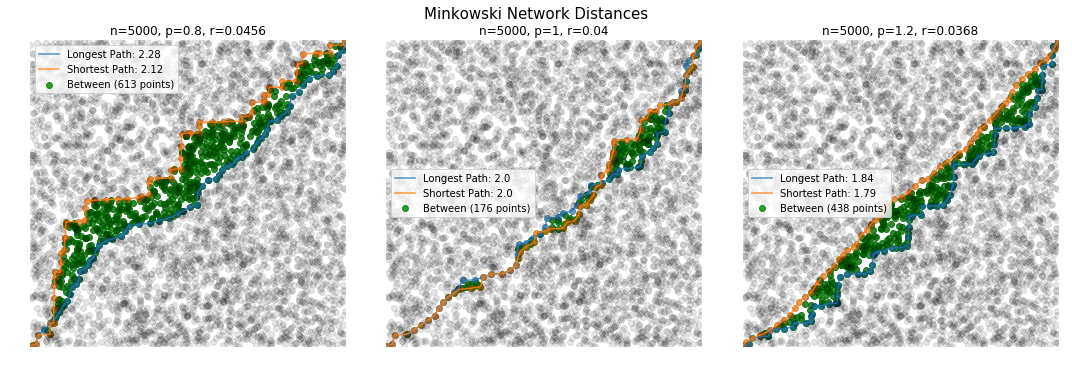

In [82]:
n=5000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

fig, axes = plt.subplots(ncols=3,figsize=(15, 5))

ps, rs = [0.8, 1, 1.2], np.array([1.14, 1, 0.92])/25

for p, r, ax in zip(ps, rs, axes.flatten()):

    connections = mt.get_connections(points, pval=p, radius=r)

    short_path, short_dist = mt.shortest_path(connections)
    short_path_points = np.array([points[:, u] for u in short_path]).transpose()

    long_path, long_dist = mt.longest_path(connections)
    long_path_points = np.array([points[:, u] for u in long_path]).transpose()

    betweens = mt.points_between(points, long_path_points, short_path_points)
    ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
    mt.plot_path_points(ax, paths=[long_path_points, short_path_points], path_labels=['Longest Path: {:.3}'.format(long_dist), 'Shortest Path: {:.3}'.format(short_dist)])
    ax.scatter(*points, c='k', alpha=0.1)
    ax.set(title='n={}, p={}, r={:.3}'.format(n, p, r))

title = plt.suptitle('Minkowski Network Distances', size=15)
plt.tight_layout()
title.set_position([.5, 1.02])
# plt.savefig('./img/LongShortComparison.pdf')

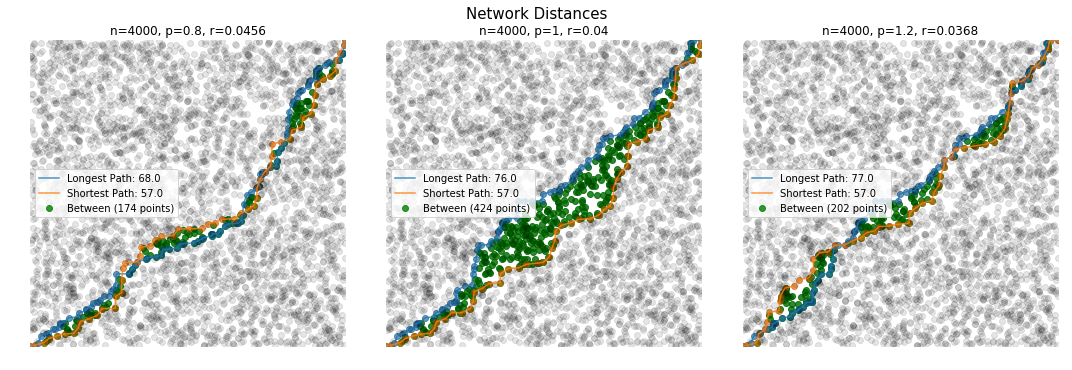

In [81]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

fig, axes = plt.subplots(ncols=3,figsize=(15, 5))

ps, rs = [0.8, 1, 1.2], np.array([1.14, 1, 0.92])/25

for p, r, ax in zip(ps, rs, axes.flatten()):

    connections = mt.get_connections(points, pval=p, radius=r)

    short_path, short_dist = mt.shortest_path(connections.astype(bool))
    short_path_points = np.array([points[:, u] for u in short_path]).transpose()

    long_path, long_dist = mt.longest_path(connections.astype(bool))
    long_path_points = np.array([points[:, u] for u in long_path]).transpose()

    betweens = mt.points_between(points, long_path_points, short_path_points)
    ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
    mt.plot_path_points(ax, paths=[long_path_points, short_path_points], path_labels=['Longest Path: {:.3}'.format(long_dist), 'Shortest Path: {:.3}'.format(short_dist)])
    ax.scatter(*points, c='k', alpha=0.1)
    ax.set(title='n={}, p={}, r={:.3}'.format(n, p, r))

title = plt.suptitle('Network Distances', size=15)
plt.tight_layout()
title.set_position([.5, 1.02])
# plt.savefig('./img/LongShortComparison.pdf')

In [ ]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [14]:
rs = np.arange(0.04, 0.06, 0.001)
ps = [2 for _ in range(len(rs))]

av_edges = []

for p, r in zip(ps, rs):
    connections = mt.get_connections(points, pval=p, radius=r)
    av_edges.append(np.sum(connections.astype(bool))/n)

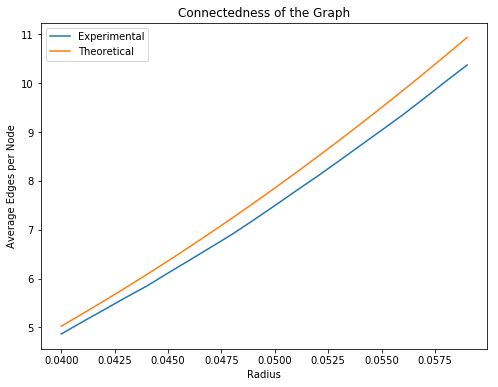

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(rs, av_edges, label='Experimental')
ax.plot(rs, np.pi*rs*rs*n/4, label='Theoretical')
ax.set(title='Connectedness of the Graph', xlabel='Radius', ylabel='Average Edges per Node')
_ = ax.legend()

In [24]:
# TODO: Need to do above calculation for other p vals, but make sure that the

In [34]:
n=1000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

connections = mt.get_connections(points, pval=2, radius=.15)

In [35]:
long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
long_path, long_length = mt.longest_path(connections)
short_path, short_length = mt.shortest_path(connections)
short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))

In [36]:
long_path_pointsBool = np.array([points[:, u] for u in long_pathBool]).transpose()
long_path_points = np.array([points[:, u] for u in long_path]).transpose()
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
short_path_pointsBool = np.array([points[:, u] for u in short_pathBool]).transpose()

In [37]:
long_path_pointsBool, long_lengthBool

(array([[1.        , 0.99687266, 0.98124571, 0.86536574, 0.72949239,
         0.68012443, 0.67967726, 0.61451394, 0.61291509, 0.58694117,
         0.56697845, 0.56410513, 0.52652068, 0.5256639 , 0.52253733,
         0.48220109, 0.48185283, 0.47859735, 0.46988829, 0.43985334,
         0.43367199, 0.39171902, 0.35410553, 0.22896226, 0.21793285,
         0.21491871, 0.11222266, 0.11071864, 0.06542641, 0.05735387,
         0.05140255, 0.04312718, 0.03889029, 0.03287217, 0.03254229,
         0.03043832, 0.02379751, 0.01078362, 0.        ],
        [1.        , 0.99242151, 0.99083957, 0.99013201, 0.98972967,
         0.97978575, 0.96657386, 0.96533022, 0.95512787, 0.93862472,
         0.93599076, 0.82791272, 0.8270268 , 0.80108686, 0.79989939,
         0.78682813, 0.76707557, 0.75669758, 0.74891078, 0.60705997,
         0.60413957, 0.59665225, 0.59431803, 0.53090056, 0.52201841,
         0.47026298, 0.42513442, 0.39454035, 0.38380743, 0.32721207,
         0.31479593, 0.30735947, 0.28449511, 

In [12]:
fileName = 'output5'
fracts = np.exp(np.arange(-3, 4, 1)*np.log(2))

# for p in np.arange(0.8, 1.25, 0.05):
# for p in [0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ]:
#     for r in [0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8]:
#         for n in [250, 500, 1000, 2000, 4000, 8000, 16000]:

headers = 'p - r - n - short_lengthBool - long_lengthBool - short_length - long_length - short_pathBoolpoints - long_pathBoolpoints - short_pathpoints - long_pathpoints\n'
file1 = open("outputs/{}.txt".format(fileName),"a") 
file1.writelines(headers)
file1.close()

r = 0.1
n = 1000
for p in [0.8, 1, 1.2]:

        print(p, r, n)

        rand_points = np.random.uniform(size=(2, n-2))
        edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
        points = np.concatenate((rand_points, edge_points), axis=1)

        connections = mt.get_connections(points, pval=p, radius=r)

        long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
        long_path, long_length = mt.longest_path(connections)

        short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))
        short_path, short_length = mt.shortest_path(connections)

        short_pathBoolpoints, long_pathBoolpoints, short_pathpoints, long_pathpoints = [[list(points[:, u]) for u in indexes] for indexes in [short_pathBool, long_pathBool, short_path, long_path]]
        
        file1 = open("outputs/{}.txt".format(fileName),"a") 
        
        file1.writelines('{} - {} - {} - {} - {} - {} - {} - {} - {} - {} - {}\n'.format(p, r, n, short_lengthBool, long_lengthBool, short_length, long_length, short_pathBoolpoints, long_pathBoolpoints, short_pathpoints, long_pathpoints))
        file1.close()

0.8 0.1 1000
1 0.1 1000
1.2 0.1 1000


Running for p=0.8
Running for p=0.9
Running for p=1
Running for p=1.2


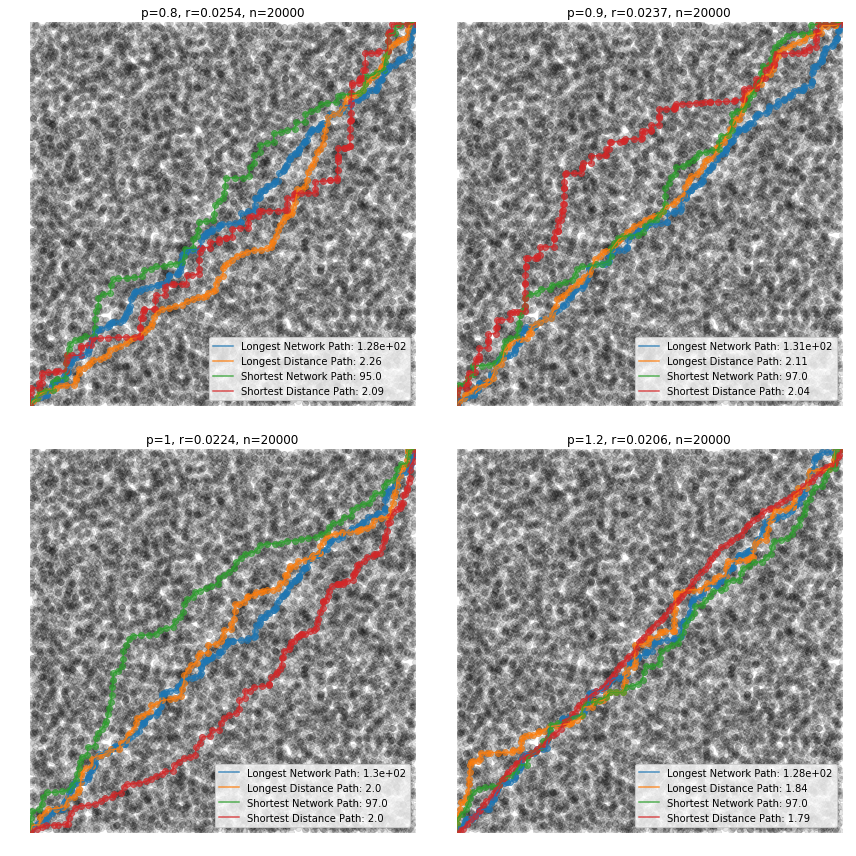

In [95]:
n=20000
av_edges=5
fig, axes = plt.subplots(2, 2, figsize=(12,12))
ps = [0.8, 0.9, 1, 1.2]

points = np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1)

for p, ax in zip(ps, axes.flatten()):
    
    print(f'Running for p={p}')

    r = mt.norm_kernel_2D(p, av_edges/n)
    connections = mt.get_connections(points, pval=p, radius=r)
    
    path_labels=[]
    paths=[]
    
    long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
    long_path, long_length = mt.longest_path(connections)
    short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))
    short_path, short_length = mt.shortest_path(connections)
    
    path_labels.append('Longest Network Path: {:}'.format(long_lengthBool))
    path_labels.append('Longest Distance Path: {:.3}'.format(long_length))
    path_labels.append('Shortest Network Path: {:}'.format(short_lengthBool))
    path_labels.append('Shortest Distance Path: {:.3}'.format(short_length))
    
    paths.append(long_pathBool)
    paths.append(long_path)
    paths.append(short_pathBool)
    paths.append(short_path)
    
    mt.plot_points_simple(ax, points, paths, path_labels)
    ax.set(title=f'p={p}, r={r:.4f}, n={n}')
    
plt.tight_layout()
# plt.savefig('./img/bigrun.pdf')